In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer as lb
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder as le
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score




# ***Exploratory Data Analysis***

In [3]:
dataset= pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


***Checking for missing values***

In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***We have some missing values and we need to deal with them***

***We also need to check and deal with deplucated values***

In [7]:
sum(dataset.duplicated(subset = 'PassengerId')) == 0

True

In [9]:
dataset['Survived'] = dataset['Survived'].astype('category')
dataset["Survived"].describe()

count     891
unique      2
top         0
freq      549
Name: Survived, dtype: int64

In [8]:
dataset["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
dataset["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [12]:
dataset["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [13]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
dataset.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

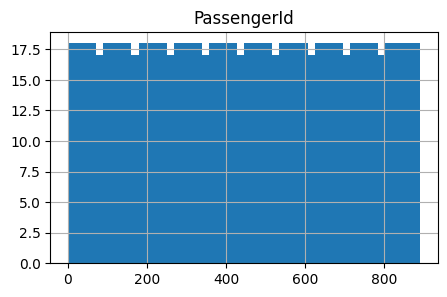

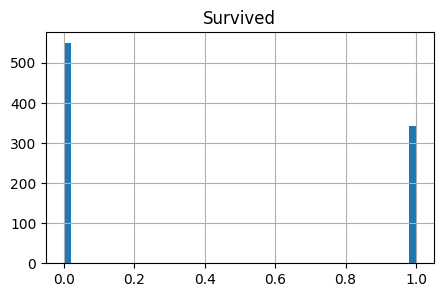

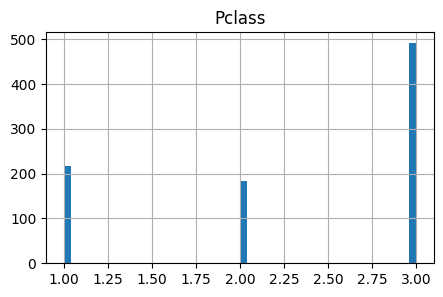

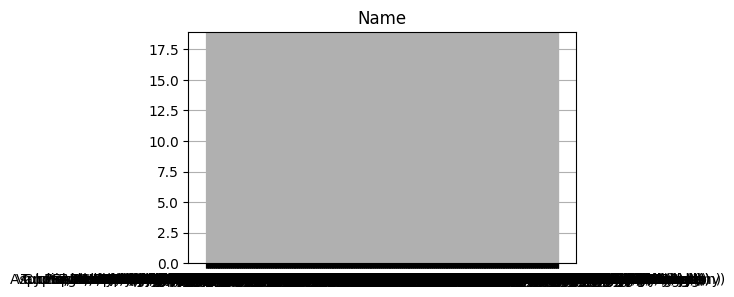

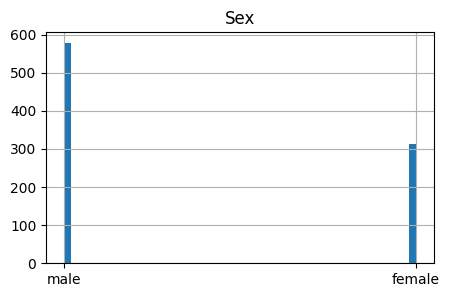

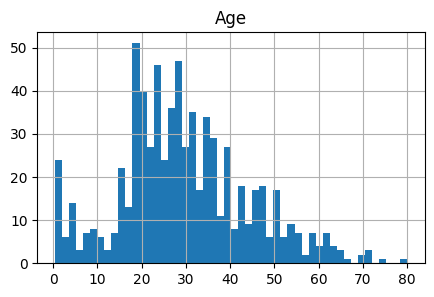

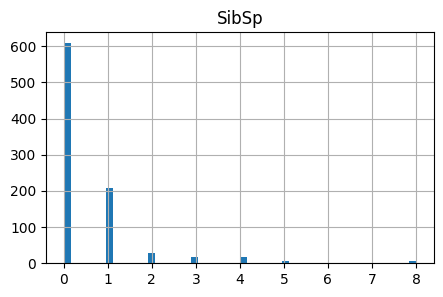

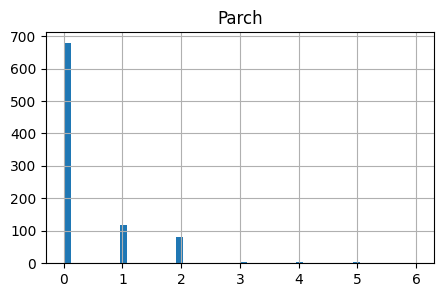

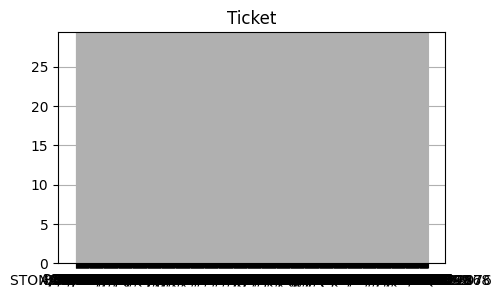

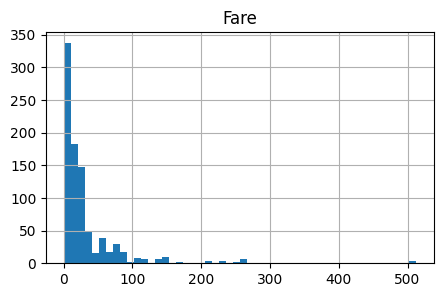

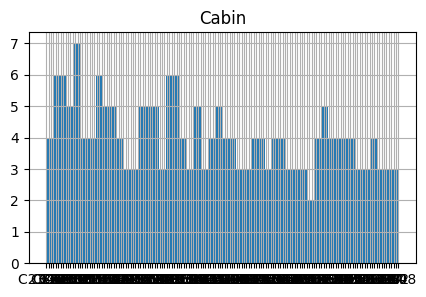

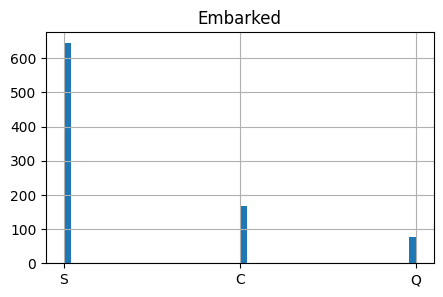

In [9]:
# Tracer l'histogramme de chaque variable
for column in dataset.columns:
    plt.figure(figsize=(5,3))  # Ajuster la taille de la figure
    dataset[column].hist(bins=50)
    plt.title(column)
plt.show()


# ***Encoding features: "embarked", "Cabin", "sex"***

In [15]:
imputer = SimpleImputer(strategy='most_frequent')
# Apply imputer on "Embarked" colomn to deal with nan values
dataset[['Embarked']] = imputer.fit_transform(dataset[['Embarked']])
dataset["Embarked"].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [17]:
#encoded_embarked = ohe().fit_transform(dataset[['Embarked']]).toarray()
ohe = OneHotEncoder()
ohe.fit(dataset[['Embarked']])

encoded_data = ohe.transform(dataset[['Embarked']]).toarray()

In [18]:
encoded_embarked_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['Embarked']))


In [19]:
new_dataset = pd.concat([dataset, encoded_embarked_df], axis=1)

In [21]:
new_dataset['Cabin_encoded'] = le().fit_transform(dataset['Cabin'])
new_dataset['Sex_encoded'] = le().fit_transform(dataset['Sex'])


In [22]:
new_dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Cabin_encoded,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,147,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0,81,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,147,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0,55,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,147,1


In [23]:
new_dataset.drop(['Name','Ticket','Embarked', 'Sex'], axis=1, inplace=True)


In [24]:
new_dataset.drop(['Cabin'], axis=1, inplace=True)

new_dataset.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_encoded,Sex_encoded
0,1,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,147,1
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,81,0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,147,0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,55,0
4,5,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,147,1


***Correlation Matrix***

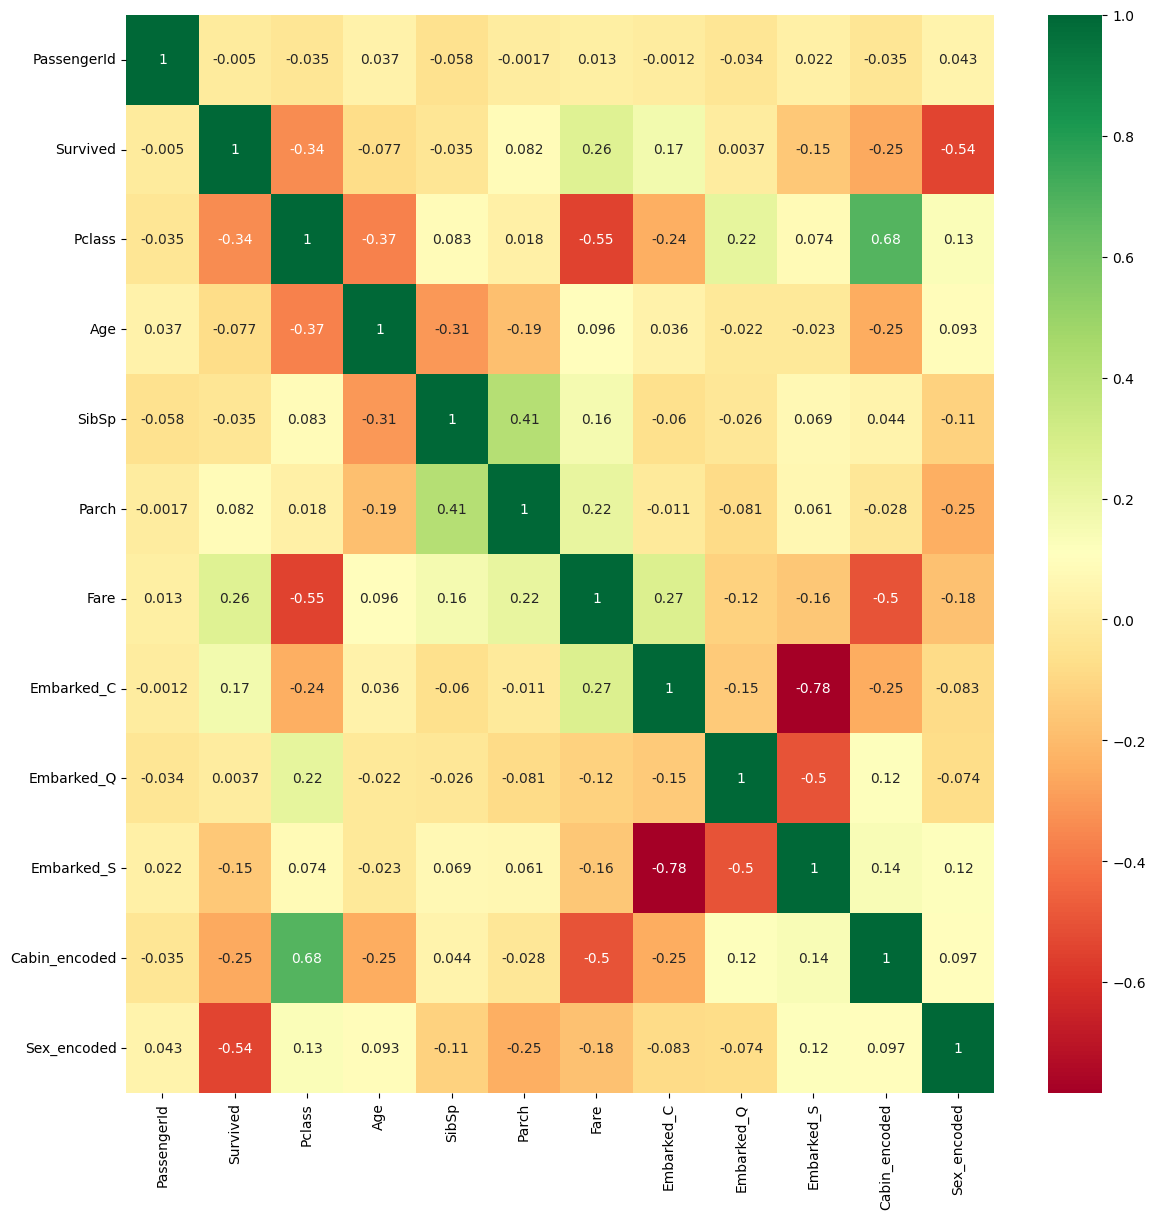

In [26]:
plt.figure(figsize=(14,14))
sns.heatmap(new_dataset.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [27]:
new_dataset['Survived'] = new_dataset['Survived'].astype('int')
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Age            714 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked_C     891 non-null    float64
 8   Embarked_Q     891 non-null    float64
 9   Embarked_S     891 non-null    float64
 10  Cabin_encoded  891 non-null    int64  
 11  Sex_encoded    891 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 83.7 KB


***We can notice that there are missing data on "Age" column and we need to deal with it***

In [28]:
median = new_dataset["Age"].median()
median

28.0

***The median is a relevant value to fill missing data because through the Age histogram, we can see that most of values are around the median***

In [29]:
new_dataset["Age"].fillna(median, inplace = True)

/tmp/ipykernel_36/2957813307.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_dataset["Age"].fillna(median, inplace = True)


In [30]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked_C     891 non-null    float64
 8   Embarked_Q     891 non-null    float64
 9   Embarked_S     891 non-null    float64
 10  Cabin_encoded  891 non-null    int64  
 11  Sex_encoded    891 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 83.7 KB


**So all missing data have been treated**

In [31]:
Y=new_dataset['Survived']
X=new_dataset.drop(['PassengerId','Survived'], axis=1)

<Axes: >

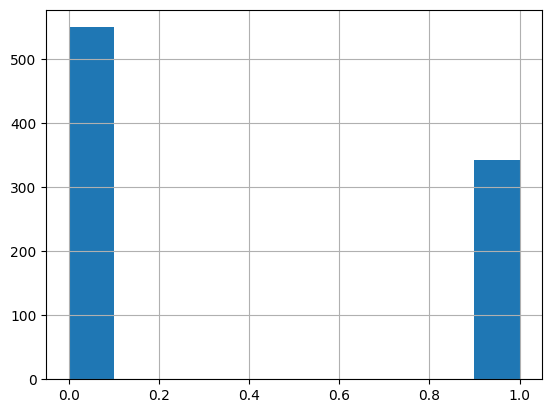

In [47]:
new_dataset["Survived"].hist()

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ***Using the logistic regression model on our non-transformed data***

In [37]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [38]:
predictions = lr.predict(X_test)

# Évaluation de la performance du modèle Logistic Regression
accuracy = accuracy_score(Y_test, predictions)
print("accuracy du modèle :", accuracy)

# Calcul de la matrice de confusion pour le modèle Logistic Regression
matrice_confusion = confusion_matrix(Y_test, predictions)
print("Matrice de confusion :")
print(matrice_confusion)

accuracy du modèle : 0.7877094972067039
Matrice de confusion :
[[89 16]
 [22 52]]


In [39]:
TP_rf = matrice_confusion[1, 1]
FP_rf = matrice_confusion[0, 1]
FN_rf = matrice_confusion[1, 0]

# Précision du modèle Logistic Regression
precision= TP_rf / (TP_rf + FP_rf)
print("Précision du modèle  :", precision)

# Rappel (sensibilité) du modèle Logistic Regression
recall= TP_rf / (TP_rf + FN_rf)
print("Rappel (sensibilité) du modèle  :", recall)

# Score F1 du modèle Logistic Regression
F1_score= 2 * (precision * recall) / (precision+ recall)
print("Score F1 du modèle  :", F1_score)


Précision du modèle  : 0.7647058823529411
Rappel (sensibilité) du modèle  : 0.7027027027027027
Score F1 du modèle  : 0.7323943661971832


***Now we will scale and normalize our data before using logistic regression***

In [45]:
#Normalising our X_train data
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

# ***Training and prediction of our scaled data with logistic regression***

In [48]:
lr.fit(X_train_s, Y_train)
X_test_s = s.transform(X_test)
y_pred_ = lr.predict(X_test_s)

In [51]:
# Évaluation de la performance du modèle Logistic Regression
accuracy = accuracy_score(Y_test, y_pred_)
print("accuracy du modèle :", accuracy)

# Calcul de la matrice de confusion pour le Logistic Regression
matrice_confusion2 = confusion_matrix(Y_test, y_pred_)
print("Matrice de confusion2 :")
print(matrice_confusion2)

accuracy du modèle : 0.8044692737430168
Matrice de confusion2 :
[[90 15]
 [20 54]]


In [53]:
TP = matrice_confusion2[1, 1]
FP = matrice_confusion2[0, 1]
FN = matrice_confusion2[1, 0]

# Précision du modèle Logistic Regression
precision2= TP / (TP + FP)
print("Précision du modèle  :", precision2)

# Rappel (sensibilité) du modèle Logistic Regression
recall2= TP / (TP + FN)
print("Rappel (sensibilité) du modèle  :", recall2)

# Score F1 du modèle Logistic Regression
F1_score2= 2 * (precision2 * recall2) / (precision2+ recall2)
print("Score F1 du modèle  :", F1_score2)

Précision du modèle  : 0.782608695652174
Rappel (sensibilité) du modèle  : 0.7297297297297297
Score F1 du modèle  : 0.7552447552447553


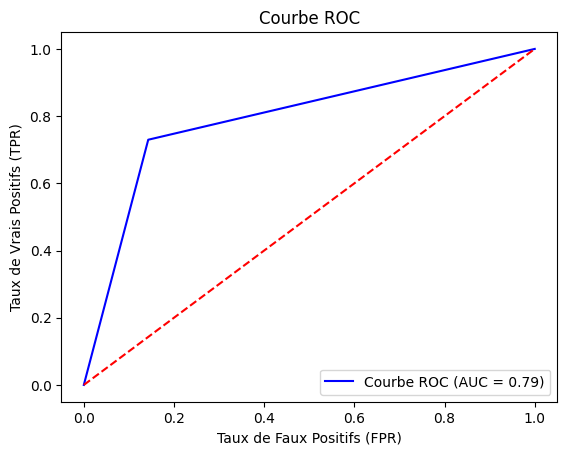

In [65]:
# ROC for Logistic Regression
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_)

# Calculer l'AUC
auc_score = roc_auc_score(Y_test, y_pred_)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Courbe ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonale pour le modèle aléatoire
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# ***We will use decision_tree model in order to compare with logistic_regression***

In [55]:
dt=DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [57]:
prediction_dt=dt.predict(X_test)

In [58]:
# Évaluation de la performance du modèle decision tree
accuracy3 = accuracy_score(Y_test, prediction_dt)
print("accuracy du modèle :", accuracy3)

# Calcul de la matrice de confusion pour le modèle decision_tree
matrice_confusion_dt = confusion_matrix(Y_test, prediction_dt)
print("Matrice de confusion_dt :")
print(matrice_confusion_dt)

accuracy du modèle : 0.8156424581005587
Matrice de confusion_dt :
[[87 18]
 [15 59]]


In [60]:
TP_dt = matrice_confusion_dt[1, 1]
FP_dt = matrice_confusion_dt[0, 1]
FN_dt = matrice_confusion_dt[1, 0]

# Précision du modèle decision tree
precision_dt= TP_dt / (TP_dt + FP_dt)
print("Précision du modèle  :", precision_dt)

# Rappel (sensibilité) du modèle decision_tree
recall_dt= TP_dt / (TP_dt + FN_dt)
print("Rappel (sensibilité) du modèle  :", recall_dt)

# Score F1 du modèle decision_tree
F1_score_dt= 2 * (precision_dt * recall_dt) / (precision_dt+ recall_dt)
print("Score F1 du modèle  :", F1_score_dt)

Précision du modèle  : 0.7662337662337663
Rappel (sensibilité) du modèle  : 0.7972972972972973
Score F1 du modèle  : 0.7814569536423841


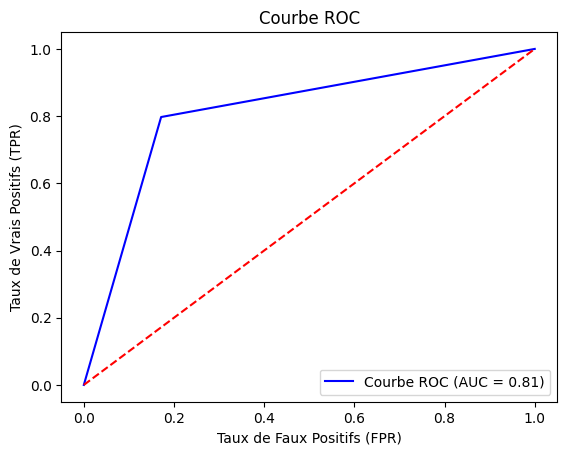

In [66]:
# ROC curve for Decision tree 
fpr, tpr, thresholds = roc_curve(Y_test,prediction_dt)

# Calculer l'AUC
auc_score = roc_auc_score(Y_test, prediction_dt)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Courbe ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonale pour le modèle aléatoire
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

#  ***Finally we got interesting insights for both models. In fact the Area Under the Curve (AUC) of the  02 models are 0.79(logistic Regression) and 0.81(Decision tree). But as we can notice decision tree classifier brought out more great insides. With logistic Regression we saw that scaled data are most impactful and lead to better insights.
# So applying several models on the data or transformation like scaling can lead better insights***